# CZ4046 Assignment 1 Part 2

## Experiment 1

### Import required libraries

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

### Define grid

In [4]:
class Grid:
    def __init__(self, width, height, start):
        self.width = width
        self.height = height
        self.i = start[0]
        self.j = start[1]
        
    def set(self, rewards, actions):  
        self.rewards = rewards
        self.actions = actions 
    
    def set_state(self, s):
        self.i = s[0]
        self.j = s[1]
        
    def current_state(self):
        return (self.i, self.j)

    def is_terminal(self, s):
        return s not in self.actions
    
    def move(self, action):
        if action in self.actions[(self.i, self.j)]:
            if action == 'U':
                self.i -= 1
            elif action == 'D':
                self.i += 1
            elif action == 'R':
                self.j += 1
            elif action == 'L':
                self.j -= 1
        
        else:
            pass
        
        return self.rewards.get((self.i, self.j), 0)
    
    def undo_move(self, action):
        if action == 'U':
            self.i += 1
        elif action == 'D':
            self.i -= 1
        elif action == 'R':
            self.j -= 1
        elif action == 'L':
            self.j += 1
            
        assert(self.current_state() in self.all_states())
    
    def end_game(self):
        return (self.i, self.j) not in self.actions
    
    def all_states(self):
        return set(list(self.actions.keys()) + list(self.rewards.keys()))
    
def stand_grid():
    grid = Grid(10, 10, (3, 2))
    rewards = {(0,0):1, (0,2):1, (0,5):1, (1,3):1, (2,4):1, (3,5):1, (4,6):1, (5,7):1,(6,8):1, (7,9):1, 
               (1,1):-1, (1,5):-1, (2,2):-1, (3,3):-1, (4,4):-1, (6,6):-1, (7,7):-1, (8,8):-1}
    actions = {
        (0,0): ('D'),
        (0,2): ('R', 'D'),
        (0,3): ('R', 'D', 'L'),
        (0,4): ('R', 'L'),
        (0,5): ('R', 'D', 'L'),
        (0,6): ('R', 'D', 'L'),
        (0,7): ('R', 'D', 'L'),
        (0,8): ('R', 'D', 'L'),
        (0,9): ('D', 'L'),
        (1,0): ('U', 'R', 'D'),
        (1,1): ('R', 'D', 'L'),
        (1,2): ('U', 'R', 'D', 'L'),
        (1,3): ('U', 'D', 'L'),
        (1,5): ('U', 'D', 'R'),
        (1,6): ('U', 'R', 'D', 'L'),
        (1,7): ('U', 'R', 'D', 'L'),
        (1,8): ('U', 'R', 'D', 'L'),
        (1,9): ('U', 'D', 'L'),
        (2,0): ('U', 'R', 'D'),
        (2,1): ('U', 'R', 'D', 'L'),
        (2,2): ('U', 'R', 'D', 'L'),
        (2,3): ('U', 'R', 'D', 'L'),
        (2,4): ('R', 'D', 'L'),
        (2,5): ('U', 'R', 'D', 'L'),
        (2,6): ('U', 'R', 'D', 'L'),
        (2,7): ('U', 'R', 'D', 'L'),
        (2,8): ('U', 'R', 'D', 'L'),
        (2,9): ('U', 'D', 'L'),
        (3,0): ('U', 'R', 'D'),
        (3,1): ('U', 'R', 'L'),
        (3,2): ('U', 'R', 'L'),
        (3,3): ('U', 'R', 'L'),
        (3,4): ('U', 'R', 'D', 'L'),
        (3,5): ('U', 'R', 'D', 'L'),
        (3,6): ('U', 'R', 'D', 'L'),
        (3,7): ('U', 'R', 'D', 'L'),
        (3,8): ('U', 'R', 'D', 'L'),
        (3,9): ('U', 'D', 'L'),
        (4,0): ('U', 'D'),
        (4,4): ('U', 'R', 'D'),
        (4,5): ('U', 'R', 'D', 'L'),
        (4,6): ('U', 'R', 'D', 'L'),
        (4,7): ('U', 'R', 'D', 'L'),
        (4,8): ('U', 'R', 'D', 'L'),
        (4,9): ('U', 'D', 'L'),
        (5,0): ('U', 'R', 'D'),
        (5,1): ('R', 'D', 'L'),
        (5,2): ('R', 'D', 'L'),
        (5,3): ('R', 'D', 'L'),
        (5,4): ('U', 'R', 'D', 'L'),
        (5,5): ('U', 'R', 'D', 'L'),
        (5,6): ('U', 'R', 'D', 'L'),
        (5,7): ('U', 'R', 'D', 'L'),
        (5,8): ('U', 'R', 'D', 'L'),
        (5,9): ('U', 'D', 'L'),
        (6,0): ('U', 'R', 'D'),
        (6,1): ('U', 'R', 'D', 'L'),
        (6,2): ('U', 'R', 'D', 'L'),
        (6,3): ('U', 'R', 'D', 'L'),
        (6,4): ('U', 'R', 'D', 'L'),
        (6,5): ('U', 'R', 'D', 'L'),
        (6,6): ('U', 'R', 'D', 'L'),
        (6,7): ('U', 'R', 'D', 'L'),
        (6,8): ('U', 'R', 'D', 'L'),
        (6,9): ('U', 'D', 'L'),
        (7,0): ('U', 'R', 'D'),
        (7,1): ('U', 'R', 'L'),
        (7,2): ('U', 'R', 'L'),
        (7,3): ('U', 'R', 'L'),
        (7,4): ('U', 'R', 'D', 'L'),
        (7,5): ('U', 'R', 'D', 'L'),
        (7,6): ('U', 'R', 'D', 'L'),
        (7,7): ('U', 'R', 'D', 'L'),
        (7,8): ('U', 'R', 'D', 'L'),
        (7,9): ('U', 'D', 'L'),
        (8,0): ('U', 'D'),
        (8,4): ('U', 'R', 'D'),
        (8,5): ('U', 'R', 'D', 'L'),
        (8,6): ('U', 'R', 'D', 'L'),
        (8,7): ('U', 'R', 'D', 'L'),
        (8,8): ('U', 'R', 'D', 'L'),
        (8,9): ('U', 'D', 'L'),
        (9,0): ('U', 'R'),
        (9,1): ('R', 'L'),
        (9,2): ('R', 'L'),
        (9,3): ('R', 'L'),
        (9,4): ('U', 'R', 'L'),
        (9,5): ('U', 'R', 'L'),
        (9,6): ('U', 'R', 'L'),
        (9,7): ('U', 'R', 'L'),
        (9,8): ('U', 'R', 'L'),
        (9,9): ('U', 'L'),
    }
    grid.set(rewards, actions)
    return grid

def negative_grid(step_cost=-0.04):
    grid = stand_grid()
    grid.rewards.update({
        (0,3): step_cost,
        (0,4): step_cost,
        (0,6): step_cost,
        (0,7): step_cost,
        (0,8): step_cost,
        (0,9): step_cost,
        (1,0): step_cost,
        (1,2): step_cost,
        (1,6): step_cost,
        (1,7): step_cost,
        (1,8): step_cost,
        (1,9): step_cost,
        (2,0): step_cost,
        (2,1): step_cost,
        (2,3): step_cost,
        (2,5): step_cost,
        (2,6): step_cost,
        (2,7): step_cost,
        (2,8): step_cost,
        (2,9): step_cost,
        (3,0): step_cost,
        (3,1): step_cost,
        (3,2): step_cost,
        (3,4): step_cost,
        (3,6): step_cost,
        (3,7): step_cost,
        (3,8): step_cost,
        (3,9): step_cost,
        (4,0): step_cost,
        (4,5): step_cost,
        (4,7): step_cost,
        (4,8): step_cost,
        (4,9): step_cost,
        (5,0): step_cost,
        (5,1): step_cost,
        (5,2): step_cost,
        (5,3): step_cost,
        (5,4): step_cost,
        (5,5): step_cost,     
        (5,6): step_cost,
        (5,8): step_cost,
        (5,9): step_cost,
        (6,0): step_cost,
        (6,1): step_cost,
        (6,2): step_cost,
        (6,3): step_cost,
        (6,4): step_cost,
        (6,5): step_cost,     
        (6,7): step_cost,
        (6,9): step_cost,   
        (7,0): step_cost,
        (7,1): step_cost,
        (7,2): step_cost,
        (7,3): step_cost,
        (7,4): step_cost,
        (7,5): step_cost, 
        (7,6): step_cost,     
        (7,8): step_cost,
        (8,0): step_cost,
        (8,4): step_cost,
        (8,5): step_cost,     
        (8,6): step_cost,
        (8,7): step_cost,
        (8,9): step_cost, 
        (9,0): step_cost,
        (9,1): step_cost,
        (9,2): step_cost,
        (9,3): step_cost,
        (9,4): step_cost,
        (9,5): step_cost,     
        (9,6): step_cost,     
        (9,7): step_cost,
        (9,8): step_cost,     
        (9,9): step_cost, 
    })
    return grid

def start_game(agent, env):
    pass

### Print utility values

In [5]:
hist = []

def print_values(f, V, g):
    for i in range(g.width):
        
        if f == True:
            print("+----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+")
        
        for j in range(g.height):
            v = V.get((i,j), 0)
            
            if f == True:
                print(f' {v:^9.5f} |', end = ' ')
                    
            hist.append(v)
        
        if f == True:        
            print ("")
    if f == True:
        print("+----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+")

### Print policy

In [6]:
def print_policy(P, g):
    for i in range(g.width):
        print("+------+--------+--------+--------+--------+--------+--------+--------+--------+--------+")
        
        for j in range(g.height):
            a = P.get((i,j), ' ')
            print('   {}   |'.format(a), end = ' ')

        print ("")
    print("+------+--------+--------+--------+--------+--------+--------+--------+--------+--------+")

### Value Iteration

In [8]:
SMALL_ENOUGH = 10e-4
GAMMA = 0.99
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')

In [9]:
if __name__ == '__main__':
    grid = negative_grid()

    policy = {}
    for s in grid.actions.keys():
        policy[s] = np.random.choice(ALL_POSSIBLE_ACTIONS)
    
    hist = []
    
    V = {}
    states = grid.all_states()
    
    for s in states:
        
        if s in grid.actions:
            V[s] = 0
        
        else:
            V[s] = 0

    iter_no = 0
    t0 = time.time()
    
    while True:
        iter_no = iter_no + 1
        print("Iteration " + str(iter_no) + " :: ")
        biggest_change = 0
        
        for s in states: 
            old_v = V[s]
            
            if s in policy: 
                new_v = float('-inf')
                
                for a in ALL_POSSIBLE_ACTIONS:
                    grid.set_state(s)
                    r = grid.rewards.get(grid.current_state(), 0)
                    _ = grid.move(a)
                    v_correct = V[grid.current_state()]
                    grid.set_state(s)
                    
                    if a == 'U':
                        r_clockwise = grid.move('R')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('L')
                    
                    elif a == 'R':
                        r_clockwise = grid.move('D')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('U')
                    
                    elif a == 'D':
                        r_clockwise = grid.move('L')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('R')
                    
                    elif a == 'L':
                        r_clockwise = grid.move('U')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('D')
                        
                    v_anticlockwise = V[grid.current_state()]  
                    v = r + GAMMA * (0.8*v_correct + 0.1*v_clockwise + 0.1*v_anticlockwise)
                    
                    if v > new_v:
                        new_v = v
                
                V[s] = new_v
                biggest_change = max(biggest_change, np.abs(old_v - V[s]))
                
                print('Utilities:')
                print_values(True, V, grid)
                print('\n')
                                
        if biggest_change < SMALL_ENOUGH:
            break
               
    for s in policy.keys():
        best_a = None
        best_value = float('-inf')
        
        for a in ALL_POSSIBLE_ACTIONS:
            
            grid.set_state(s)
            r = grid.rewards.get(grid.current_state(), 0)    
            _ = grid.move(a)
            v_correct = V[grid.current_state()]      
            grid.set_state(s)
            
            if a == 'U':
                r_clockwise = grid.move('R')
                v_clockwise = V[grid.current_state()]
                grid.set_state(s)
                r_anticlockwise = grid.move('L')
                
            elif a == 'R':
                r_clockwise = grid.move('D')
                v_clockwise = V[grid.current_state()]
                grid.set_state(s)
                r_anticlockwise = grid.move('U')
                
            elif a == 'D':
                r_clockwise = grid.move('L')
                v_clockwise = V[grid.current_state()]
                grid.set_state(s)
                r_anticlockwise = grid.move('R')
                
            elif a == 'L':
                r_clockwise = grid.move('U')
                v_clockwise = V[grid.current_state()]
                grid.set_state(s)
                r_anticlockwise = grid.move('D')
                        
            v_anticlockwise = V[grid.current_state()] 
            v = r + GAMMA * (0.8*v_correct + 0.1*v_clockwise + 0.1*v_anticlockwise)
            
            if v > best_value:
                best_value = v
                best_a = a
        
        policy[s] = best_a
    
    t1 = time.time()
    time_taken = t1 - t0
    print('Time Taken:')
    print(time_taken)
    print('\n') 
    
    print('Optimal Utilities:')
    print_values(True, V, grid)
    print('\n') 
    print('Optimal Policy:')
    print_policy(policy, grid)
    print('\n')

Streaming output truncated to the last 5000 lines.


Utilities:
+----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
 99.89968  |   0.00000  |  94.94765  |  93.77722  |  92.55781  |  92.35003  |  90.99028  |  89.68447  |  88.42318  |  87.19970  | 
+----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
 98.29419  |  95.78398  |  94.44719  |  94.30012  |   0.00000  |  89.92480  |  89.70826  |  88.71071  |  87.67816  |  86.62586  | 
+----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
 96.84946  |  95.48849  |  93.19661  |  93.07955  |  93.00392  |  91.59291  |  90.33518  |  89.12119  |  87.94180  |  86.78773  | 
+----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
 95.45592  |  94.35457 

### Plot of utility estimates as a function of the number of iterations

In [24]:
print("Number of Iterations: ", 689)

num_iter = int(len(hist)/100)

Number of Iterations:  689


In [11]:
hist_0_0 = []
hist_0_1 = []
hist_0_2 = []
hist_0_3 = [] 
hist_0_4 = [] 
hist_0_5 = []
hist_0_6 = []
hist_0_7 = []
hist_0_8 = []
hist_0_9 = []

hist_1_0 = []
hist_1_1 = [] 
hist_1_2 = []
hist_1_3 = [] 
hist_1_4 = [] 
hist_1_5 = []
hist_1_6 = []
hist_1_7 = []
hist_1_8 = []
hist_1_9 = []

hist_2_0 = []
hist_2_1 = []
hist_2_2 = []
hist_2_3 = []
hist_2_4 = []
hist_2_5 = []
hist_2_6 = []
hist_2_7 = []
hist_2_8 = []
hist_2_9 = []

hist_3_0 = []
hist_3_1 = []
hist_3_2 = []
hist_3_3 = []
hist_3_4 = []
hist_3_5 = []
hist_3_6 = []
hist_3_7 = []
hist_3_8 = []
hist_3_9 = []

hist_4_0 = []
hist_4_1 = []
hist_4_2 = []
hist_4_3 = []
hist_4_4 = []
hist_4_5 = []
hist_4_6 = []
hist_4_7 = []
hist_4_8 = []
hist_4_9 = []

hist_5_0 = []
hist_5_1 = []
hist_5_2 = []
hist_5_3 = []
hist_5_4 = []
hist_5_5 = []
hist_5_6 = []
hist_5_7 = []
hist_5_8 = []
hist_5_9 = []

hist_6_0 = []
hist_6_1 = []
hist_6_2 = []
hist_6_3 = []
hist_6_4 = []
hist_6_5 = []
hist_6_6 = []
hist_6_7 = []
hist_6_8 = []
hist_6_9 = []

hist_7_0 = []
hist_7_1 = []
hist_7_2 = []
hist_7_3 = []
hist_7_4 = []
hist_7_5 = []
hist_7_6 = []
hist_7_7 = []
hist_7_8 = []
hist_7_9 = []

hist_8_0 = []
hist_8_1 = []
hist_8_2 = []
hist_8_3 = []
hist_8_4 = []
hist_8_5 = []
hist_8_6 = []
hist_8_7 = []
hist_8_8 = []
hist_8_9 = []

hist_9_0 = []
hist_9_1 = []
hist_9_2 = []
hist_9_3 = []
hist_9_4 = []
hist_9_5 = []
hist_9_6 = []
hist_9_7 = []
hist_9_8 = []
hist_9_9 = []


for i in range(num_iter):
    hist_0_0.append(hist[0+i*100])
    hist_1_0.append(hist[1+i*100])
    hist_2_0.append(hist[2+i*100])
    hist_3_0.append(hist[3+i*100]) 
    hist_4_0.append(hist[4+i*100])
    hist_5_0.append(hist[5+i*100]) 
    hist_6_0.append(hist[6+i*100]) 
    hist_7_0.append(hist[7+i*100]) 
    hist_8_0.append(hist[8+i*100]) 
    hist_9_0.append(hist[9+i*100]) 

    hist_0_1.append(hist[10+i*100])
    hist_1_1.append(hist[11+i*100]) 
    hist_2_1.append(hist[12+i*100]) 
    hist_3_1.append(hist[13+i*100]) 
    hist_4_1.append(hist[14+i*100]) 
    hist_5_1.append(hist[15+i*100]) 
    hist_6_1.append(hist[16+i*100])
    hist_7_1.append(hist[17+i*100]) 
    hist_8_1.append(hist[18+i*100]) 
    hist_9_1.append(hist[19+i*100]) 

    hist_0_2.append(hist[20+i*100])
    hist_1_2.append(hist[21+i*100]) 
    hist_2_2.append(hist[22+i*100])
    hist_3_2.append(hist[23+i*100])
    hist_4_2.append(hist[24+i*100])
    hist_5_2.append(hist[25+i*100])
    hist_6_2.append(hist[26+i*100])
    hist_7_2.append(hist[27+i*100]) 
    hist_8_2.append(hist[28+i*100]) 
    hist_9_2.append(hist[29+i*100]) 

    hist_0_3.append(hist[30+i*100])
    hist_1_3.append(hist[31+i*100]) 
    hist_2_3.append(hist[32+i*100])
    hist_3_3.append(hist[33+i*100])
    hist_4_3.append(hist[34+i*100])
    hist_5_3.append(hist[35+i*100])
    hist_6_3.append(hist[36+i*100])
    hist_7_3.append(hist[37+i*100]) 
    hist_8_3.append(hist[38+i*100]) 
    hist_9_3.append(hist[39+i*100]) 

    hist_0_4.append(hist[40+i*100])
    hist_1_4.append(hist[41+i*100]) 
    hist_2_4.append(hist[42+i*100])
    hist_3_4.append(hist[43+i*100])
    hist_4_4.append(hist[44+i*100])
    hist_5_4.append(hist[45+i*100])
    hist_6_4.append(hist[46+i*100])
    hist_7_4.append(hist[47+i*100]) 
    hist_8_4.append(hist[48+i*100]) 
    hist_9_4.append(hist[49+i*100]) 

    hist_0_5.append(hist[50+i*100])
    hist_1_5.append(hist[51+i*100]) 
    hist_2_5.append(hist[52+i*100])
    hist_3_5.append(hist[53+i*100])
    hist_4_5.append(hist[54+i*100])
    hist_5_5.append(hist[55+i*100])
    hist_6_5.append(hist[56+i*100])
    hist_7_5.append(hist[57+i*100]) 
    hist_8_5.append(hist[58+i*100]) 
    hist_9_5.append(hist[59+i*100]) 

    hist_0_6.append(hist[60+i*100])
    hist_1_6.append(hist[61+i*100]) 
    hist_2_6.append(hist[62+i*100])
    hist_3_6.append(hist[63+i*100])
    hist_4_6.append(hist[64+i*100])
    hist_5_6.append(hist[65+i*100])
    hist_6_6.append(hist[66+i*100])
    hist_7_6.append(hist[67+i*100]) 
    hist_8_6.append(hist[68+i*100]) 
    hist_9_6.append(hist[69+i*100]) 

    hist_0_7.append(hist[70+i*100])
    hist_1_7.append(hist[71+i*100]) 
    hist_2_7.append(hist[72+i*100])
    hist_3_7.append(hist[73+i*100])
    hist_4_7.append(hist[74+i*100])
    hist_5_7.append(hist[75+i*100])
    hist_6_7.append(hist[76+i*100])
    hist_7_7.append(hist[77+i*100]) 
    hist_8_7.append(hist[78+i*100]) 
    hist_9_7.append(hist[79+i*100])

    hist_0_8.append(hist[80+i*100])
    hist_1_8.append(hist[81+i*100]) 
    hist_2_8.append(hist[82+i*100])
    hist_3_8.append(hist[83+i*100])
    hist_4_8.append(hist[84+i*100])
    hist_5_8.append(hist[85+i*100])
    hist_6_8.append(hist[86+i*100])
    hist_7_8.append(hist[87+i*100]) 
    hist_8_8.append(hist[88+i*100]) 
    hist_9_8.append(hist[89+i*100])
  
    hist_0_9.append(hist[90+i*100])
    hist_1_9.append(hist[91+i*100]) 
    hist_2_9.append(hist[92+i*100])
    hist_3_9.append(hist[93+i*100])
    hist_4_9.append(hist[94+i*100])
    hist_5_9.append(hist[95+i*100])
    hist_6_9.append(hist[96+i*100])
    hist_7_9.append(hist[97+i*100]) 
    hist_8_9.append(hist[98+i*100]) 
    hist_9_9.append(hist[99+i*100])

In [12]:
list_of_tuples = [str((i,j)) for i in range(10) for j in range (10)]

In [13]:
from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"]=11,11

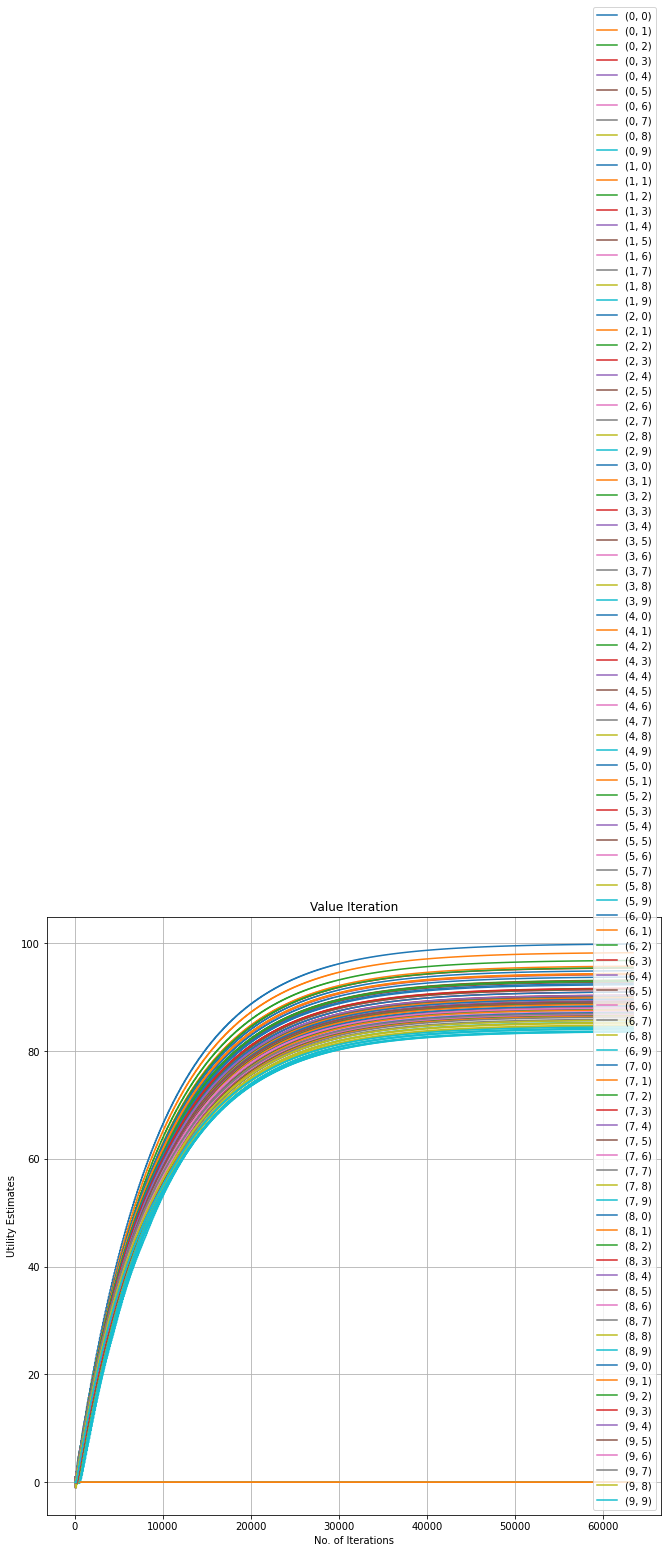

In [14]:
x = [i for i in range(num_iter)]

fig, ax = plt.subplots()
ax.plot(x, hist_0_0)
ax.plot(x, hist_0_1)
ax.plot(x, hist_0_2)
ax.plot(x, hist_0_3)
ax.plot(x, hist_0_4)
ax.plot(x, hist_0_5)
ax.plot(x, hist_0_6)
ax.plot(x, hist_0_7)
ax.plot(x, hist_0_8)
ax.plot(x, hist_0_9)

ax.plot(x, hist_1_0)
ax.plot(x, hist_1_1)
ax.plot(x, hist_1_2)
ax.plot(x, hist_1_3)
ax.plot(x, hist_1_4)
ax.plot(x, hist_1_5)
ax.plot(x, hist_1_6)
ax.plot(x, hist_1_7)
ax.plot(x, hist_1_8)
ax.plot(x, hist_1_9)

ax.plot(x, hist_2_0)
ax.plot(x, hist_2_1)
ax.plot(x, hist_2_2)
ax.plot(x, hist_2_3)
ax.plot(x, hist_2_4)
ax.plot(x, hist_2_5)
ax.plot(x, hist_2_6)
ax.plot(x, hist_2_7)
ax.plot(x, hist_2_8)
ax.plot(x, hist_2_9)

ax.plot(x, hist_3_0)
ax.plot(x, hist_3_1)
ax.plot(x, hist_3_2)
ax.plot(x, hist_3_3)
ax.plot(x, hist_3_4)
ax.plot(x, hist_3_5)
ax.plot(x, hist_3_6)
ax.plot(x, hist_3_7)
ax.plot(x, hist_3_8)
ax.plot(x, hist_3_9)

ax.plot(x, hist_4_0)
ax.plot(x, hist_4_1)
ax.plot(x, hist_4_2)
ax.plot(x, hist_4_3)
ax.plot(x, hist_4_4)
ax.plot(x, hist_4_5)
ax.plot(x, hist_4_6)
ax.plot(x, hist_4_7)
ax.plot(x, hist_4_8)
ax.plot(x, hist_4_9)

ax.plot(x, hist_5_0)
ax.plot(x, hist_5_1)
ax.plot(x, hist_5_2)
ax.plot(x, hist_5_3)
ax.plot(x, hist_5_4)
ax.plot(x, hist_5_5)
ax.plot(x, hist_5_6)
ax.plot(x, hist_5_7)
ax.plot(x, hist_5_8)
ax.plot(x, hist_5_9)

ax.plot(x, hist_6_0)
ax.plot(x, hist_6_1)
ax.plot(x, hist_6_2)
ax.plot(x, hist_6_3)
ax.plot(x, hist_6_4)
ax.plot(x, hist_6_5)
ax.plot(x, hist_6_6)
ax.plot(x, hist_6_7)
ax.plot(x, hist_6_8)
ax.plot(x, hist_6_9)

ax.plot(x, hist_7_0)
ax.plot(x, hist_7_1)
ax.plot(x, hist_7_2)
ax.plot(x, hist_7_3)
ax.plot(x, hist_7_4)
ax.plot(x, hist_7_5)
ax.plot(x, hist_7_6)
ax.plot(x, hist_7_7)
ax.plot(x, hist_7_8)
ax.plot(x, hist_7_9)

ax.plot(x, hist_8_0)
ax.plot(x, hist_8_1)
ax.plot(x, hist_8_2)
ax.plot(x, hist_8_3)
ax.plot(x, hist_8_4)
ax.plot(x, hist_8_5)
ax.plot(x, hist_8_6)
ax.plot(x, hist_8_7)
ax.plot(x, hist_8_8)
ax.plot(x, hist_8_9)

ax.plot(x, hist_9_0)
ax.plot(x, hist_9_1)
ax.plot(x, hist_9_2)
ax.plot(x, hist_9_3)
ax.plot(x, hist_9_4)
ax.plot(x, hist_9_5)
ax.plot(x, hist_9_6)
ax.plot(x, hist_9_7)
ax.plot(x, hist_9_8)
ax.plot(x, hist_9_9)

plt.legend(list_of_tuples, loc ="lower right")

ax.set(xlabel='No. of Iterations', ylabel='Utility Estimates', title='Value Iteration')
ax.grid()

fig.savefig("p2-e1-valueIter.png")
plt.show()

### Policy Iteration

In [15]:
SMALL_ENOUGH = 10e-4
GAMMA = 0.99
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')

In [16]:
if __name__ == '__main__':
    
    grid = negative_grid()
    policy = {}
    
    for s in grid.actions.keys():
        policy[s] = np.random.choice(ALL_POSSIBLE_ACTIONS)
        
    hist = []
    
    V = {}
    states = grid.all_states()
    
    for s in states: 
        V[s] = 0
        
        if s in grid.actions:
            V[s] = 0
        
        else:
            V[s] = 0
            
    iter_no = 0
    t0 = time.time()
    
    while True:
        iter_no = iter_no + 1
        print("Iteration " + str(iter_no) + " :: ")
        
        # policy evaluation 
        while True:
            biggest_change = 0
            for s in states:
                old_v = V[s]
                
                if s in policy:
                    a = policy[s]
                    grid.set_state(s)
                    
                    try:
                        r = grid.move(a)
                    
                    except KeyError:
                        continue
                    
                    grid.set_state(s)
                    r = grid.rewards.get(grid.current_state(), 0)
                    _ = grid.move(a)
                    v_correct = V[grid.current_state()]
                    grid.set_state(s)
                    
                    if a == 'U':
                        r_clockwise = grid.move('R')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('L')
                    
                    elif a == 'R':
                        r_clockwise = grid.move('D')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('U')
                    
                    elif a == 'D':
                        r_clockwise = grid.move('L')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('R')
                    
                    elif a == 'L':
                        r_clockwise = grid.move('U')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('D')
                        
                    v_anticlockwise = V[grid.current_state()]
                    v = r + GAMMA * (0.8*v_correct + 0.1*v_clockwise + 0.1*v_anticlockwise)
                    V[s] = v
                    biggest_change = max(biggest_change, np.abs(old_v - V[s]))
                    
            if biggest_change < SMALL_ENOUGH:
                break
        
        print('Utilities:')
        print_values(True, V, grid)
        print('\n')
        
        #policy improvement
        is_policy_converged = True
        
        for s in states:
            
            if s in policy:
                old_a = policy[s]
                new_a = None
                best_value = float('-inf')
                
                for a in ALL_POSSIBLE_ACTIONS:
                    grid.set_state(s)
                    
                    try:
                        r = grid.move(a)
                        
                    except KeyError:
                        continue
                    
                    grid.set_state(s)
                    r = grid.rewards.get(grid.current_state(), 0)
                    _ = grid.move(a)
                    v_correct = V[grid.current_state()]
                    grid.set_state(s)
                    
                    if a == 'U':
                        r_clockwise = grid.move('R')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('L')
                    
                    elif a == 'R':
                        r_clockwise = grid.move('D')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('U')
                    
                    elif a == 'D':
                        r_clockwise = grid.move('L')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('R')
                    
                    elif a == 'L':
                        r_clockwise = grid.move('U')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('D')
                        
                    v_anticlockwise = V[grid.current_state()]  
                    v = r + GAMMA * (0.8*v_correct + 0.1*v_clockwise + 0.1*v_anticlockwise)
                    
                    if v > best_value:
                        best_value = v
                        new_a = a
            
            policy[s] = new_a
            
            if new_a != old_a:
                is_policy_converged = False
        
        if is_policy_converged:
            break

    t1 = time.time()
    time_taken = t1 - t0
    print('Time Taken:')
    print(time_taken)
    print('\n') 
    
    print('Optimal Utilities:')
    print_values(True, V, grid)
    print('\n')
    print('Optimal Policy:')
    print_policy(policy, grid)
    print('\n')

Iteration 1 :: 
Utilities:
+----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
 19.99193  |   0.00000  |  45.69405  |  45.14242  |  39.32431  |  37.88998  |  25.09350  |  15.24302  |  13.82238  |  11.91680  | 
+----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
 11.91611  |  10.83719  |  44.62944  |  45.69405  |   0.00000  |  20.15023  |  14.76099  |  14.43338  |  14.10803  |  13.53441  | 
+----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
 12.25260  |  13.40197  |  39.96003  |  43.30779  |  32.34404  |  14.55500  |  14.36517  |  12.87273  |  13.62896  |  12.33515  | 
+----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
  5.03579  |  26.92422  |  29.00592  |  28.05350  |  27.7645

### Plot of utility estimates as a function of the number of iterations

In [23]:
print("Number of Iterations: ", 6)

num_iter = int(len(hist)/100)

Number of Iterations:  6


In [18]:
hist_0_0 = []
hist_0_1 = []
hist_0_2 = []
hist_0_3 = [] 
hist_0_4 = [] 
hist_0_5 = []
hist_0_6 = []
hist_0_7 = []
hist_0_8 = []
hist_0_9 = []

hist_1_0 = []
hist_1_1 = [] 
hist_1_2 = []
hist_1_3 = [] 
hist_1_4 = [] 
hist_1_5 = []
hist_1_6 = []
hist_1_7 = []
hist_1_8 = []
hist_1_9 = []

hist_2_0 = []
hist_2_1 = []
hist_2_2 = []
hist_2_3 = []
hist_2_4 = []
hist_2_5 = []
hist_2_6 = []
hist_2_7 = []
hist_2_8 = []
hist_2_9 = []

hist_3_0 = []
hist_3_1 = []
hist_3_2 = []
hist_3_3 = []
hist_3_4 = []
hist_3_5 = []
hist_3_6 = []
hist_3_7 = []
hist_3_8 = []
hist_3_9 = []

hist_4_0 = []
hist_4_1 = []
hist_4_2 = []
hist_4_3 = []
hist_4_4 = []
hist_4_5 = []
hist_4_6 = []
hist_4_7 = []
hist_4_8 = []
hist_4_9 = []

hist_5_0 = []
hist_5_1 = []
hist_5_2 = []
hist_5_3 = []
hist_5_4 = []
hist_5_5 = []
hist_5_6 = []
hist_5_7 = []
hist_5_8 = []
hist_5_9 = []

hist_6_0 = []
hist_6_1 = []
hist_6_2 = []
hist_6_3 = []
hist_6_4 = []
hist_6_5 = []
hist_6_6 = []
hist_6_7 = []
hist_6_8 = []
hist_6_9 = []

hist_7_0 = []
hist_7_1 = []
hist_7_2 = []
hist_7_3 = []
hist_7_4 = []
hist_7_5 = []
hist_7_6 = []
hist_7_7 = []
hist_7_8 = []
hist_7_9 = []

hist_8_0 = []
hist_8_1 = []
hist_8_2 = []
hist_8_3 = []
hist_8_4 = []
hist_8_5 = []
hist_8_6 = []
hist_8_7 = []
hist_8_8 = []
hist_8_9 = []

hist_9_0 = []
hist_9_1 = []
hist_9_2 = []
hist_9_3 = []
hist_9_4 = []
hist_9_5 = []
hist_9_6 = []
hist_9_7 = []
hist_9_8 = []
hist_9_9 = []


for i in range(num_iter):
    hist_0_0.append(hist[0+i*100])
    hist_1_0.append(hist[1+i*100])
    hist_2_0.append(hist[2+i*100])
    hist_3_0.append(hist[3+i*100]) 
    hist_4_0.append(hist[4+i*100])
    hist_5_0.append(hist[5+i*100]) 
    hist_6_0.append(hist[6+i*100]) 
    hist_7_0.append(hist[7+i*100]) 
    hist_8_0.append(hist[8+i*100]) 
    hist_9_0.append(hist[9+i*100]) 

    hist_0_1.append(hist[10+i*100])
    hist_1_1.append(hist[11+i*100]) 
    hist_2_1.append(hist[12+i*100]) 
    hist_3_1.append(hist[13+i*100]) 
    hist_4_1.append(hist[14+i*100]) 
    hist_5_1.append(hist[15+i*100]) 
    hist_6_1.append(hist[16+i*100])
    hist_7_1.append(hist[17+i*100]) 
    hist_8_1.append(hist[18+i*100]) 
    hist_9_1.append(hist[19+i*100]) 

    hist_0_2.append(hist[20+i*100])
    hist_1_2.append(hist[21+i*100]) 
    hist_2_2.append(hist[22+i*100])
    hist_3_2.append(hist[23+i*100])
    hist_4_2.append(hist[24+i*100])
    hist_5_2.append(hist[25+i*100])
    hist_6_2.append(hist[26+i*100])
    hist_7_2.append(hist[27+i*100]) 
    hist_8_2.append(hist[28+i*100]) 
    hist_9_2.append(hist[29+i*100]) 

    hist_0_3.append(hist[30+i*100])
    hist_1_3.append(hist[31+i*100]) 
    hist_2_3.append(hist[32+i*100])
    hist_3_3.append(hist[33+i*100])
    hist_4_3.append(hist[34+i*100])
    hist_5_3.append(hist[35+i*100])
    hist_6_3.append(hist[36+i*100])
    hist_7_3.append(hist[37+i*100]) 
    hist_8_3.append(hist[38+i*100]) 
    hist_9_3.append(hist[39+i*100]) 

    hist_0_4.append(hist[40+i*100])
    hist_1_4.append(hist[41+i*100]) 
    hist_2_4.append(hist[42+i*100])
    hist_3_4.append(hist[43+i*100])
    hist_4_4.append(hist[44+i*100])
    hist_5_4.append(hist[45+i*100])
    hist_6_4.append(hist[46+i*100])
    hist_7_4.append(hist[47+i*100]) 
    hist_8_4.append(hist[48+i*100]) 
    hist_9_4.append(hist[49+i*100]) 

    hist_0_5.append(hist[50+i*100])
    hist_1_5.append(hist[51+i*100]) 
    hist_2_5.append(hist[52+i*100])
    hist_3_5.append(hist[53+i*100])
    hist_4_5.append(hist[54+i*100])
    hist_5_5.append(hist[55+i*100])
    hist_6_5.append(hist[56+i*100])
    hist_7_5.append(hist[57+i*100]) 
    hist_8_5.append(hist[58+i*100]) 
    hist_9_5.append(hist[59+i*100]) 

    hist_0_6.append(hist[60+i*100])
    hist_1_6.append(hist[61+i*100]) 
    hist_2_6.append(hist[62+i*100])
    hist_3_6.append(hist[63+i*100])
    hist_4_6.append(hist[64+i*100])
    hist_5_6.append(hist[65+i*100])
    hist_6_6.append(hist[66+i*100])
    hist_7_6.append(hist[67+i*100]) 
    hist_8_6.append(hist[68+i*100]) 
    hist_9_6.append(hist[69+i*100]) 

    hist_0_7.append(hist[70+i*100])
    hist_1_7.append(hist[71+i*100]) 
    hist_2_7.append(hist[72+i*100])
    hist_3_7.append(hist[73+i*100])
    hist_4_7.append(hist[74+i*100])
    hist_5_7.append(hist[75+i*100])
    hist_6_7.append(hist[76+i*100])
    hist_7_7.append(hist[77+i*100]) 
    hist_8_7.append(hist[78+i*100]) 
    hist_9_7.append(hist[79+i*100])

    hist_0_8.append(hist[80+i*100])
    hist_1_8.append(hist[81+i*100]) 
    hist_2_8.append(hist[82+i*100])
    hist_3_8.append(hist[83+i*100])
    hist_4_8.append(hist[84+i*100])
    hist_5_8.append(hist[85+i*100])
    hist_6_8.append(hist[86+i*100])
    hist_7_8.append(hist[87+i*100]) 
    hist_8_8.append(hist[88+i*100]) 
    hist_9_8.append(hist[89+i*100])
  
    hist_0_9.append(hist[90+i*100])
    hist_1_9.append(hist[91+i*100]) 
    hist_2_9.append(hist[92+i*100])
    hist_3_9.append(hist[93+i*100])
    hist_4_9.append(hist[94+i*100])
    hist_5_9.append(hist[95+i*100])
    hist_6_9.append(hist[96+i*100])
    hist_7_9.append(hist[97+i*100]) 
    hist_8_9.append(hist[98+i*100]) 
    hist_9_9.append(hist[99+i*100])

In [19]:
list_of_tuples = [str((i,j)) for i in range(10) for j in range (10)]

In [20]:
from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"]=11,11

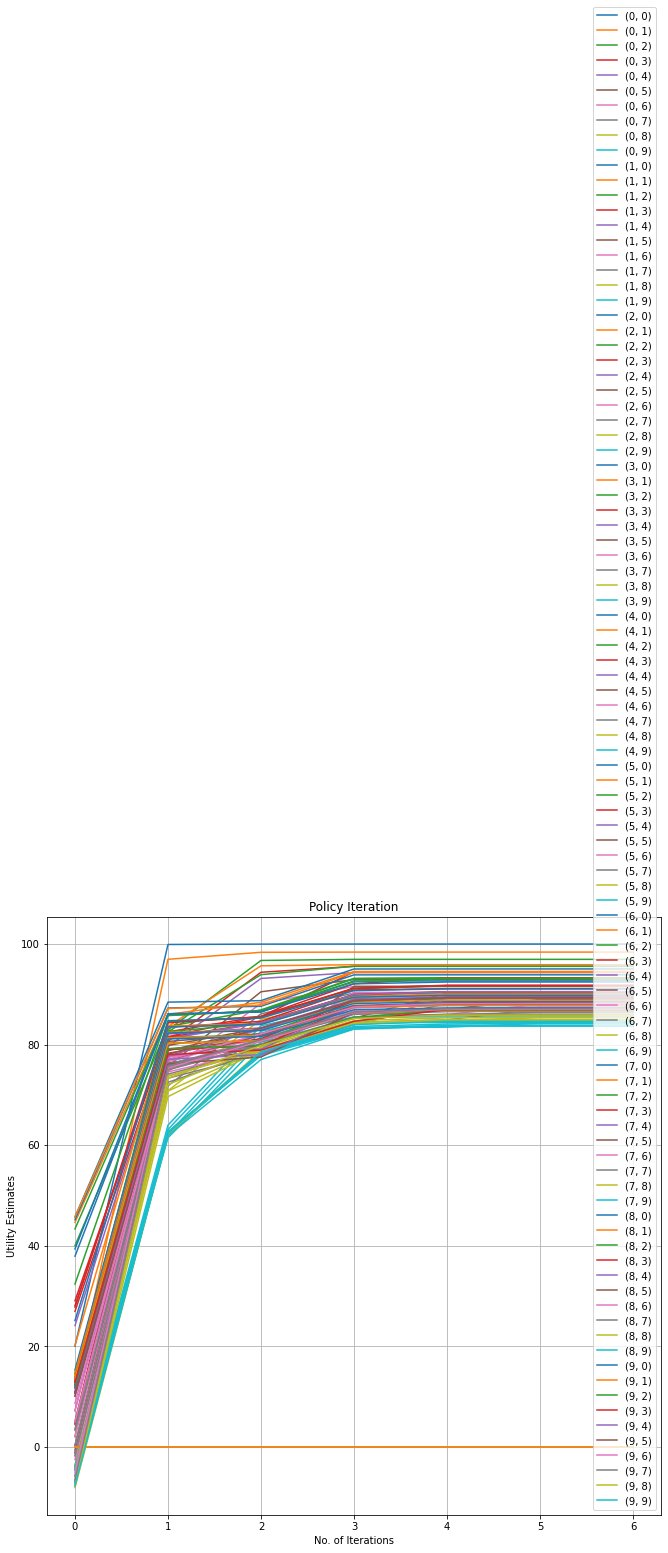

In [21]:
x = [i for i in range(num_iter)]

fig, ax = plt.subplots()
ax.plot(x, hist_0_0)
ax.plot(x, hist_0_1)
ax.plot(x, hist_0_2)
ax.plot(x, hist_0_3)
ax.plot(x, hist_0_4)
ax.plot(x, hist_0_5)
ax.plot(x, hist_0_6)
ax.plot(x, hist_0_7)
ax.plot(x, hist_0_8)
ax.plot(x, hist_0_9)

ax.plot(x, hist_1_0)
ax.plot(x, hist_1_1)
ax.plot(x, hist_1_2)
ax.plot(x, hist_1_3)
ax.plot(x, hist_1_4)
ax.plot(x, hist_1_5)
ax.plot(x, hist_1_6)
ax.plot(x, hist_1_7)
ax.plot(x, hist_1_8)
ax.plot(x, hist_1_9)

ax.plot(x, hist_2_0)
ax.plot(x, hist_2_1)
ax.plot(x, hist_2_2)
ax.plot(x, hist_2_3)
ax.plot(x, hist_2_4)
ax.plot(x, hist_2_5)
ax.plot(x, hist_2_6)
ax.plot(x, hist_2_7)
ax.plot(x, hist_2_8)
ax.plot(x, hist_2_9)

ax.plot(x, hist_3_0)
ax.plot(x, hist_3_1)
ax.plot(x, hist_3_2)
ax.plot(x, hist_3_3)
ax.plot(x, hist_3_4)
ax.plot(x, hist_3_5)
ax.plot(x, hist_3_6)
ax.plot(x, hist_3_7)
ax.plot(x, hist_3_8)
ax.plot(x, hist_3_9)

ax.plot(x, hist_4_0)
ax.plot(x, hist_4_1)
ax.plot(x, hist_4_2)
ax.plot(x, hist_4_3)
ax.plot(x, hist_4_4)
ax.plot(x, hist_4_5)
ax.plot(x, hist_4_6)
ax.plot(x, hist_4_7)
ax.plot(x, hist_4_8)
ax.plot(x, hist_4_9)

ax.plot(x, hist_5_0)
ax.plot(x, hist_5_1)
ax.plot(x, hist_5_2)
ax.plot(x, hist_5_3)
ax.plot(x, hist_5_4)
ax.plot(x, hist_5_5)
ax.plot(x, hist_5_6)
ax.plot(x, hist_5_7)
ax.plot(x, hist_5_8)
ax.plot(x, hist_5_9)

ax.plot(x, hist_6_0)
ax.plot(x, hist_6_1)
ax.plot(x, hist_6_2)
ax.plot(x, hist_6_3)
ax.plot(x, hist_6_4)
ax.plot(x, hist_6_5)
ax.plot(x, hist_6_6)
ax.plot(x, hist_6_7)
ax.plot(x, hist_6_8)
ax.plot(x, hist_6_9)

ax.plot(x, hist_7_0)
ax.plot(x, hist_7_1)
ax.plot(x, hist_7_2)
ax.plot(x, hist_7_3)
ax.plot(x, hist_7_4)
ax.plot(x, hist_7_5)
ax.plot(x, hist_7_6)
ax.plot(x, hist_7_7)
ax.plot(x, hist_7_8)
ax.plot(x, hist_7_9)

ax.plot(x, hist_8_0)
ax.plot(x, hist_8_1)
ax.plot(x, hist_8_2)
ax.plot(x, hist_8_3)
ax.plot(x, hist_8_4)
ax.plot(x, hist_8_5)
ax.plot(x, hist_8_6)
ax.plot(x, hist_8_7)
ax.plot(x, hist_8_8)
ax.plot(x, hist_8_9)

ax.plot(x, hist_9_0)
ax.plot(x, hist_9_1)
ax.plot(x, hist_9_2)
ax.plot(x, hist_9_3)
ax.plot(x, hist_9_4)
ax.plot(x, hist_9_5)
ax.plot(x, hist_9_6)
ax.plot(x, hist_9_7)
ax.plot(x, hist_9_8)
ax.plot(x, hist_9_9)

plt.legend(list_of_tuples, loc ="lower right")

ax.set(xlabel='No. of Iterations', ylabel='Utility Estimates', title='Policy Iteration')
ax.grid()

fig.savefig("p2-e1-policyIter.png")
plt.show()